In [42]:
import xarray as xr

In [49]:
x = xr.open_dataset('GLDAS_CLSM025_D.A20140101.020.nc4')
x

<xarray.Dataset>
Dimensions:            (lat: 600, lon: 1440, time: 1, bnds: 2)
Coordinates:
  * lat                (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * lon                (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time               (time) datetime64[ns] 2014-01-01
Dimensions without coordinates: bnds
Data variables: (12/34)
    time_bnds          (time, bnds) datetime64[ns] ...
    Swnet_tavg         (time, lat, lon) float32 ...
    Lwnet_tavg         (time, lat, lon) float32 ...
    Qle_tavg           (time, lat, lon) float32 ...
    Qh_tavg            (time, lat, lon) float32 ...
    Qg_tavg            (time, lat, lon) float32 ...
    ...                 ...
    Rainf_f_tavg       (time, lat, lon) float32 ...
    Tair_f_tavg        (time, lat, lon) float32 ...
    Qair_f_tavg        (time, lat, lon) float32 ...
    Psurf_f_tavg       (time, lat, lon) float32 ...
    SWdown_f_tavg      (time, lat, lon) float32 ...
    LWdown_f_tavg      (time, lat, lon) float32 ...
Attributes: (12/14)
    missing_value:          -9999.0
    tavg definision::       24-hour average
    title:                  LIS land surface model output
    institution:            NASA GSFC HSL
    source:                 CLSM_F2.5
    history:                created on date: 2017-06-12T20:17:54.666
    ...                     ...
    comment:                website: http://ldas.gsfc.nasa.gov/gldas, http://...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

(105, 105)


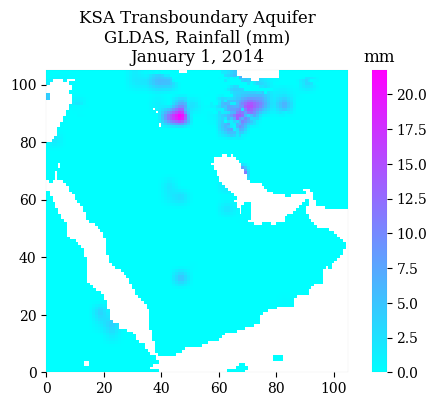

In [90]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 100

y = x.Rainf_tavg[0]
y = y[285:390,855:960] * 86400
y.to_netcdf('matrix_constrained__mid_east_transbo.nc')
print(y.shape)

plt.pcolormesh(y,cmap='cool')
plt.gca().set_aspect('equal')
plt.title('KSA Transboundary Aquifer\nGLDAS, Rainfall (mm)\nJanuary 1, 2014')
cbr = plt.colorbar()
cbr.ax.set_title('mm')
plt.savefig('gldas__clip/mid_east_noclip__01012014.png',bbox_inches='tight') ## saves figure

In [50]:
import glob
import numpy as np
import xarray as xr
from shapely.geometry import mapping
import geopandas

In [57]:
def clip2(raster,basin):
    rast = xr.open_dataset(raster)
    rast.rio.write_crs(4326,inplace=True)
    rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    r_clip.to_netcdf(f'gldas__clip/rioclip__ksa_transbo.nc')
    return r_clip

# raster = x[0] #selected first 

basin = geopandas.read_file('/work/albertl_uri_edu/middle__east/transboundary_all.shp')


clip2('matrix_constrained__mid_east_transbo.nc',basin)

ERROR 1: PROJ: proj_create_from_database: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<xarray.Dataset>
Dimensions:      (lat: 77, lon: 54)
Coordinates:
  * lat          (lat) float64 16.12 16.38 16.62 16.88 ... 34.62 34.88 35.12
  * lon          (lon) float64 39.38 39.62 39.88 40.12 ... 52.12 52.38 52.62
    time         datetime64[ns] ...
    spatial_ref  int64 0
Data variables:
    Rainf_tavg   (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [58]:
pwd

'/work/albertl_uri_edu/middle__east'

In [59]:
z = xr.open_dataset('gldas__clip/rioclip__ksa_transbo.nc')
z

<xarray.Dataset>
Dimensions:      (lat: 77, lon: 54)
Coordinates:
  * lat          (lat) float32 16.12 16.38 16.62 16.88 ... 34.62 34.88 35.12
  * lon          (lon) float32 39.38 39.62 39.88 40.12 ... 52.12 52.38 52.62
    time         datetime64[ns] ...
Data variables:
    spatial_ref  int64 ...
    Rainf_tavg   (lat, lon) float64 ...

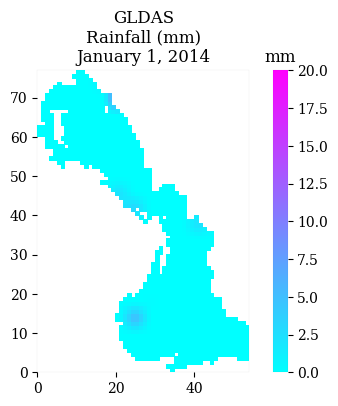

In [89]:
plt.pcolormesh(z.Rainf_tavg,cmap='cool',vmin=0,vmax=20)
plt.gca().set_aspect('equal')
plt.title("GLDAS\nRainfall (mm)\nJanuary 1, 2014")
cbr = plt.colorbar()
cbr.ax.set_title('mm')
z.Rainf_tavg.shape
plt.savefig('gldas__clip/mid_east_rioclip__01012014_nocarto.png',bbox_inches='tight') ## saves figure


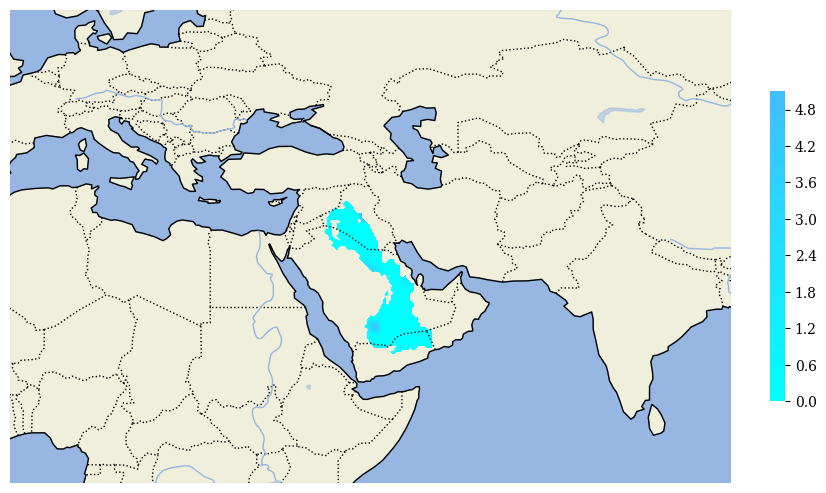

time elapsed:	0.452


In [153]:
# timing the script
import time
import geopandas as gp

t0 = time.time() # marks start

# matplotlib pyplot plotting interface, supposed to synthesize MATLAB plots
import matplotlib.pyplot as plt

# for creating the legend
import matplotlib.patches as mpatches

#cartopy coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 100


fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with


sa = gp.read_file('/work/albertl_uri_edu/middle__east/mideast_transbo_shp/transboundary_all.shp') ## https://bearriverinfo.org/files-ou/dataset-downloads/brfromhuc12.zip
# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([0, 90, 0, 50])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
# ax.add_geometries(sa.geometry,crs=ccrs.epsg(32638),color='#2ca02c') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color

plt.contourf(z.lon, z.lat, z.Rainf_tavg, 60,
             transform=ccrs.PlateCarree(),cmap='cool',vmin=0,vmax=20)
cbr = plt.colorbar(fraction=.02)

# colorado = mpatches.Patch(color='#d62728', label='Colorado') #creates legend item, specifies color
# plt.savefig('mid__east__transbo.png',bbox_inches='tight')
# ax.legend(handles=[bearriver],loc='lower left',fontsize=20) # creates legend
# plt.savefig('gldas__clip/mid_east_rioclip__01012014_carto.png',bbox_inches='tight') ## saves figure
plt.show() ## plots figure

t1 = time.time() # marks completion
print(f"time elapsed:\t{round(t1-t0,3)}")

In [154]:
x = xr.open_dataset('GLDAS_CLSM025_D.A19700101.020.nc4.SUB.nc4')
x

<xarray.Dataset>
Dimensions:     (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time        (time) datetime64[ns] 1970-01-01
  * lon         (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat         (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    Rainf_tavg  (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2017-05-27T03:49:10.775
    source:                 CLSM_F2.5
    institution:            NASA GSFC HSL
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on June ...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

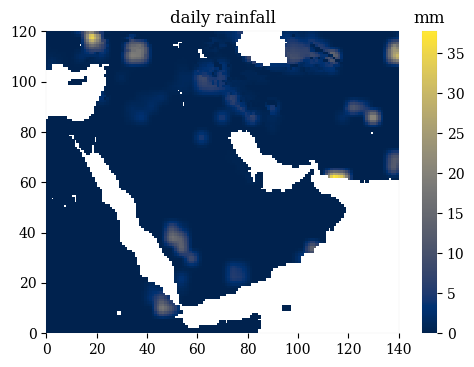

In [161]:
plt.pcolormesh(x.Rainf_tavg[0]*86400,cmap='cividis')
cbar = plt.colorbar()
cbar.ax.set_title('mm')
plt.title('daily rainfall')
plt.gca().set_aspect('equal')

In [124]:
f = open("subset_GLDAS_CLSM025_D_2.0_20220622_200818.txt", "r")

lis = [i.strip() for i in f]
lis = lis[1:]
lis = np.asarray(lis)
lis.shape

(16435,)

## ran below in .py script

In [146]:
# import requests

# # loads list of files to download
# lis = lis


# # this script obtained from NASA Earthdata's wiki
# # https://wiki.earthdata.nasa.gov/
# # please note that to run, you'll need to include your NASA Earthdata credentials

# class SessionWithHeaderRedirection(requests.Session):
#     AUTH_HOST = 'urs.earthdata.nasa.gov'

#     def __init__(self, username, password):
#         super().__init__()
#         self.auth = (username, password)

#     # Overrides from the library to keep headers when redirected to or from the NASA auth host.
#     def rebuild_auth(self, prepared_request, response):
#         headers = prepared_request.headers
#         url = prepared_request.url
#         if 'Authorization' in headers:
#             original_parsed = requests.utils.urlparse(response.request.url)
#             redirect_parsed = requests.utils.urlparse(url)
#             if (original_parsed.hostname != redirect_parsed.hostname) and \
#                redirect_parsed.hostname != self.AUTH_HOST and \
#                original_parsed.hostname != self.AUTH_HOST:
#                 del headers['Authorization']
#         return


# # create session with the user credentials that will be used to authenticate access to the data

# username="albertlarson" ###YOU THE READER OF FLUXTOFLOW NEED A NASA EARTHDATA ACCOUNT!!!
# password="Andes27Hearts34!"
# session = SessionWithHeaderRedirection(username, password)



# # checks file folder to see if your destination folder for all these NLDAS files has any files in it, to
# # prevent your code from downloading the same files multiple times.


# destination_files = 'gldas__clip/*.nc'
# y = [eeks[12:] for eeks in glob.glob(destination_files)]
# print(y)
# not_dled = []
# dled = []
# for x in lis:
#     if str(x[148:156]) not in y:
#         not_dled.append(x)
#     if str(x[148:156:])  in y:
#         dled.append(x)


# # this while loop keeps attempting to download all of the files in your list of NLDAS files until all 
# # of them have been downloaded. it also presents an http message number associated with your request 
# # https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages
# while True:
#     for idx,i in enumerate(not_dled):
#         try:

#             # submit the request using the session
#             response = session.get(i, stream=True)
#             print(response.status_code)
#             # raise an exception in case of http errors
#             response.raise_for_status()
#             # save the file
#             with open(f'gldas__clip/ksa_{i[148:156]}.nc', 'wb') as fd:
#                 for data in response:
#                     fd.write(data)
#             fd.close()
#         except requests.exceptions.HTTPError as e:
#             # handle any errors here
#             print('error',e)
    
#     dled = []        
#     not_dled = []
#     for x in lis:
#         y = [eeks[12:] for eeks in glob.glob(destination_files)]
#         if str(x[148:156]) not in y:
#             not_dled.append(x)
#         if str(x[148:156]) in y:
#             dled.append(x)
#     print(f'dled: \t \n \t')
#     for x in dled:
#         print('\t',x,'\t')
#     print(f'not dled: \t \n \t')
#     for x in not_dled:
#         print('\t',x,'\t')

            
#     if len(not_dled) == 0:
#         import sys
#         sys.exit('no more left to download')

In [148]:
x = xr.open_dataset('gldas__clip/ksa_19700214.nc')
x


<xarray.Dataset>
Dimensions:     (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time        (time) datetime64[ns] 1970-02-14
  * lon         (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat         (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    Rainf_tavg  (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2017-05-27T04:30:14.208
    source:                 CLSM_F2.5
    institution:            NASA GSFC HSL
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on June ...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [135]:
date = []
for i in lis:
    date.append(i[148:156])
date = np.asarray(date)
date.shape

(16435,)

In [136]:
date[-1]

'20141230'

In [149]:
x = glob.glob('gldas__clip/*.nc')
len(x)


1483

In [150]:
x[-1]

'gldas__clip/ksa_19740122.nc'

In [1]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
x = glob.glob('gldas__clip/*.nc')
len(x)

16435

In [4]:
x[-1]

'gldas__clip/ksa_20141230.nc'

<xarray.Dataset>
Dimensions:     (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time        (time) datetime64[ns] 2014-12-29
  * lon         (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat         (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    Rainf_tavg  (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2017-06-14T07:28:28.079
    source:                 CLSM_F2.5
    institution:            NASA GSFC HSL
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    history_L34RS:          'Created by L34RS v1.4.2 @ NASA GES DISC on June ...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

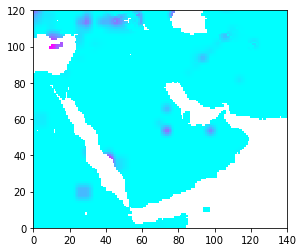

In [17]:
x_neg1 = xr.open_dataset(x[-2])
plt.pcolormesh(x_neg1.Rainf_tavg[0],cmap='cool')
plt.gca().set_aspect('equal')
x_neg1

In [29]:
from pathlib import Path

root_directory = Path('./gldas__clip/')

x = sum(f.stat().st_size for f in root_directory.glob('*.nc') if f.is_file())
print(f"{x} bytes")

690707273 bytes


In [30]:
print(f"{x/1000} kilobytes")
print(f"{x/1000000} megabytes")
print(f"{x/1e9} gigabytes")

690707.273 kilobytes
690.707273 megabytes
0.690707273 gigabytes


In [41]:
destination_files = 'gldas__clip/*.nc'
y = [eeks[16:-3] for eeks in glob.glob(destination_files)]
# print(y)
not_dled = []
dled = []
for x in lis:
    if str(x[148:156]) not in y:
        not_dled.append(x)
    if str(x[148:156:])  in y:
        dled.append(x)
y[0]

'19700101'

In [43]:
len(dled)

16435

In [36]:
f = open("subset_GLDAS_CLSM025_D_2.0_20220622_200818.txt", "r")

lis = [i.strip() for i in f]
lis = lis[1:]
lis = np.asarray(lis)

In [39]:
lis[0][148:156]

'19700101'